 implementing the data cleansing using an hr dataset includes hire date, position, salary, performance ratings, attendance, and leave records.

 1.Implementing data

In [ ]:
import pandas as pd

# Creating a sample HR dataset
data = {
    'employee_id': [1, 2, 3, 4, 5, 6],
    'salary': [50000, 60000, None, 55000, 58000, 72000],
    'age': [25, 28, 35, None, 30, 40],
    'department': ['HR', 'IT', 'HR', 'Finance', None, 'IT'],
    'hire_date': ['2015-01-15', '2016-03-20', '2018-07-10', '2017-02-28', '2019-05-22', '2014-11-01']
}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Get a summary of the dataset
print(df.info())
print(df.describe())


   employee_id   salary   age department   hire_date
0            1  50000.0  25.0         HR  2015-01-15
1            2  60000.0  28.0         IT  2016-03-20
2            3      NaN  35.0         HR  2018-07-10
3            4  55000.0   NaN    Finance  2017-02-28
4            5  58000.0  30.0       None  2019-05-22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  6 non-null      int64  
 1   salary       5 non-null      float64
 2   age          5 non-null      float64
 3   department   5 non-null      object 
 4   hire_date    6 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 368.0+ bytes
None
       employee_id        salary       age
count     6.000000      5.000000   5.00000
mean      3.500000  59000.000000  31.60000
std       1.870829   8185.352772   5.94138
min       1.000000  50000.000000  25.00000
2

2.Identifying and handling missing values

In [ ]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values (example: fill with mean for numerical columns)
df['salary'].fillna(df['salary'].mean(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)

# For categorical columns, fill with mode
df['department'].fillna(df['department'].mode()[0], inplace=True)


Missing values:
 employee_id    0
salary         1
age            1
department     1
hire_date      0
dtype: int64


3.identifying and handling outliers

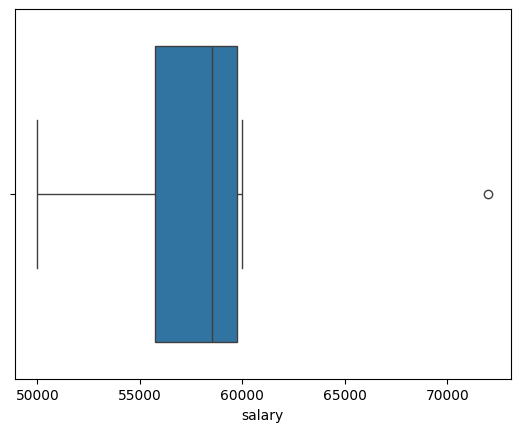

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Visualize outliers using a box plot
sns.boxplot(x=df['salary'])
plt.show()

# Handle outliers (example: capping the values)
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['salary'] = df['salary'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


4.correcting inconsistences

In [ ]:
import pandas as pd
import re

# Creating a sample HR dataset
data = {
    'employee_id': [1, 2, 3, 4, 5, 6],
    'salary': [50000, 60000, None, 55000, 58000, 72000],
    'age': [25, 28, 35, None, 30, 40],
    'department': ['HR', 'IT', 'HR', 'Finance', None, 'IT'],
    'hire_date': ['2015-01-15', '2016-03-20', '2018-07-10', '2017-02-28', '2019-05-22', '2014-11-01']
}

df = pd.DataFrame(data)

# Step 4: Correcting Inconsistencies
# Standardize data formats (example: date format)
df['hire_date'] = pd.to_datetime(df['hire_date'], format='%Y-%m-%d')

# Correct categorical data inconsistencies using regular expressions
def clean_department(dept):
    if isinstance(dept, str):
        dept = dept.lower().strip()
        dept = re.sub(r'\s+', ' ', dept)  # Replace multiple spaces with a single space
        dept = re.sub(r'[^a-z\s]', '', dept)  # Remove non-alphabetical characters
    return dept

df['department'] = df['department'].apply(clean_department)

# Check for inconsistencies
if df['department'].isna().sum() == 0 and df['department'].str.contains('[^a-z\s]', regex=True).sum() == 0:
    print("Data does not have inconsistencies.")
else:
    print("After correcting inconsistencies:")
    print(df)


After correcting inconsistencies:
   employee_id   salary   age department  hire_date
0            1  50000.0  25.0         hr 2015-01-15
1            2  60000.0  28.0         it 2016-03-20
2            3      NaN  35.0         hr 2018-07-10
3            4  55000.0   NaN    finance 2017-02-28
4            5  58000.0  30.0       None 2019-05-22
5            6  72000.0  40.0         it 2014-11-01


5.Removing duplicates

In [ ]:
# Add a duplicate row for demonstration
df = pd.concat([df, df.iloc[[2]]], ignore_index=True)

# Detect duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates
df = df.drop_duplicates()

Number of duplicate rows: 1


6.Feature engineering

In [ ]:
import pandas as pd

# Sample data
data = {
    'hire_date': ['2015-05-20', '2018-09-15', '2020-01-10', None, '2017-07-30']
}

df = pd.DataFrame(data)

# Convert 'hire_date' to datetime format
df['hire_date'] = pd.to_datetime(df['hire_date'], format='%Y-%m-%d')

# Create 'tenure' feature with if-else condition
df['tenure'] = df['hire_date'].apply(lambda x: pd.Timestamp.now().year - x.year if pd.notnull(x) else None)

print(df)


   hire_date  tenure
0 2015-05-20     9.0
1 2018-09-15     6.0
2 2020-01-10     4.0
3        NaT     NaN
4 2017-07-30     7.0


7.Normalized data set


In [ ]:
import pandas as pd
import numpy as np

# Creating a sample HR dataset
data = {
    'employee_id': [1, 2, 3, 4, 5, 6],
    'salary': [50000, 60000, 59000, 55000, 58000, 72000],
    'age': [25, 28, 35, 31.6, 30, 40],
    'department': ['HR', 'IT', 'HR', 'Finance', 'unknown', 'IT'],
    'hire_date': ['2015-01-15', '2016-03-20', '2018-07-10', '2017-02-28', '2019-05-22', '2014-11-01']
}

df = pd.DataFrame(data)

# Min-Max Normalization
df['salary_min_max'] = (df['salary'] - df['salary'].min()) / (df['salary'].max() - df['salary'].min())
df['age_min_max'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())

# Z-Score Normalization
df['salary_z_score'] = (df['salary'] - df['salary'].mean()) / df['salary'].std()
df['age_z_score'] = (df['age'] - df['age'].mean()) / df['age'].std()

# Decimal Scaling
df['salary_decimal_scaling'] = df['salary'] / 10**np.ceil(np.log10(df['salary'].abs().max()))
df['age_decimal_scaling'] = df['age'] / 10**np.ceil(np.log10(df['age'].abs().max()))

# Print the normalized dataset
df


,employee_id,salary,age,department,hire_date,salary_min_max,age_min_max,salary_z_score,age_z_score,salary_decimal_scaling,age_decimal_scaling
0,1,50000,25.0,HR,2015-01-15,0.000000,0.000000,-1.229306,-1.241971e+00,0.50,0.250
1,2,60000,28.0,IT,2016-03-20,0.454545,0.200000,0.136590,-6.774389e-01,0.60,0.280
2,3,59000,35.0,HR,2018-07-10,0.409091,0.666667,0.000000,6.398034e-01,0.59,0.350
3,4,55000,31.6,Finance,2017-02-28,0.227273,0.440000,-0.546358,6.685407e-16,0.55,0.316
4,5,58000,30.0,unknown,2019-05-22,0.363636,0.333333,-0.136590,-3.010840e-01,0.58,0.300
5,6,72000,40.0,IT,2014-11-01,1.000000,1.000000,1.775665,1.580691e+00,0.72,0.400


8.Data visualization (distributions)


*  A) histogram



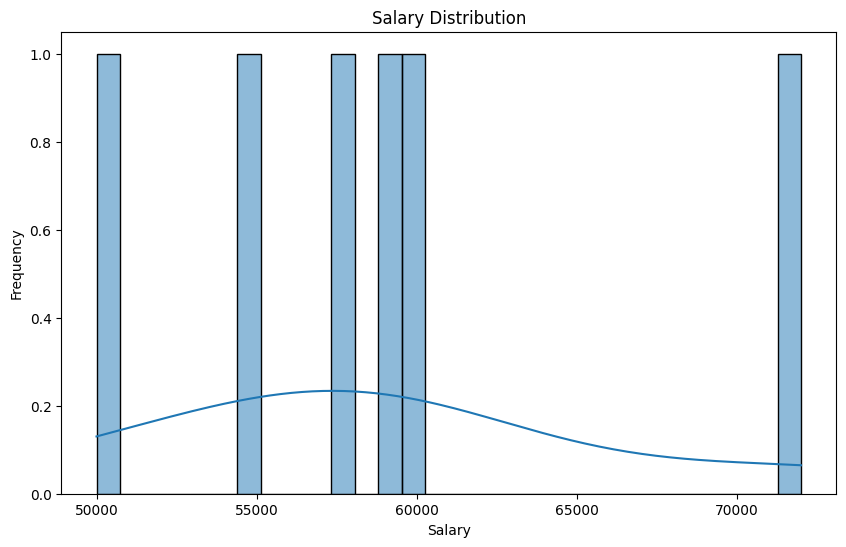

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a histogram for 'salary' column
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


B) box plot

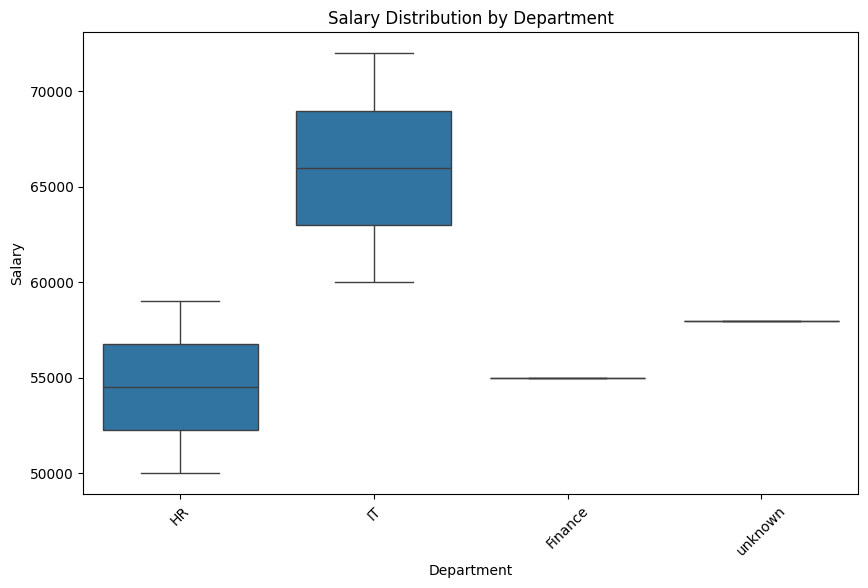

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='salary', data=df)
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


 C) violin plot

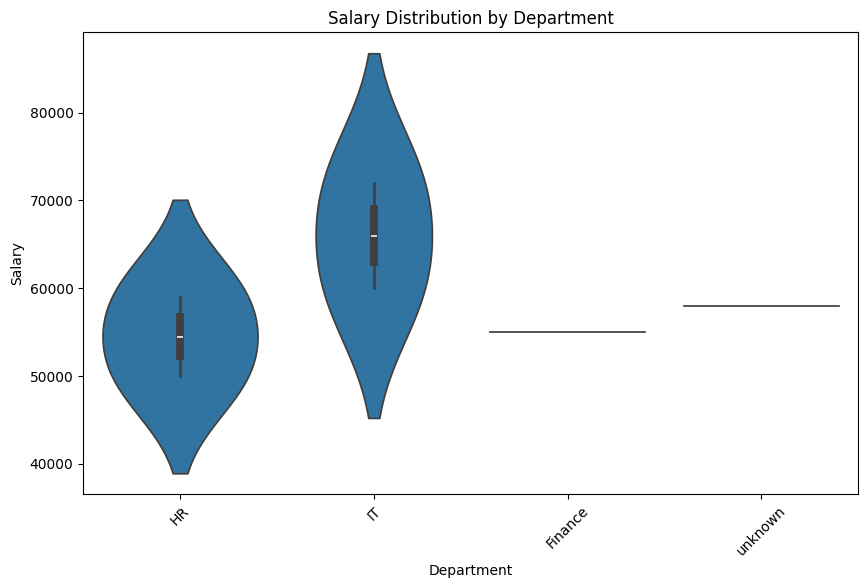

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='department', y='salary', data=df)
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


9 Data visualizations (Relationships)


> A) scatter plot



Index(['employee_id', 'salary', 'age', 'department', 'hire_date',
       'salary_min_max', 'age_min_max', 'salary_z_score', 'age_z_score',
       'salary_decimal_scaling', 'age_decimal_scaling'],
      dtype='object')


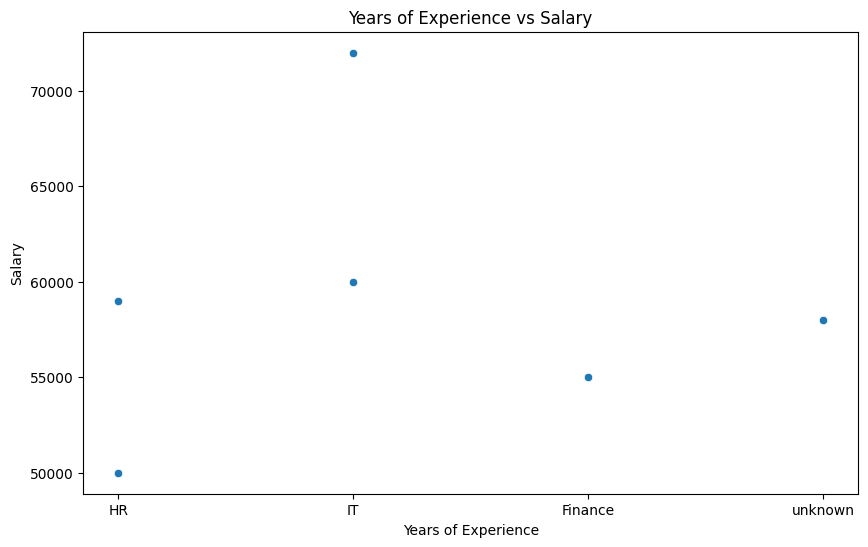

In [ ]:
# Verify the column names in your DataFrame
print(df.columns)

# Correct the column name in the scatterplot function if there is a typo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='department', y='salary', data=df)  # Replace 'correct_column_name' with the actual name
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

B) pair plot

Index(['employee_id', 'salary', 'age', 'department', 'hire_date',
       'salary_min_max', 'age_min_max', 'salary_z_score', 'age_z_score',
       'salary_decimal_scaling', 'age_decimal_scaling'],
      dtype='object')


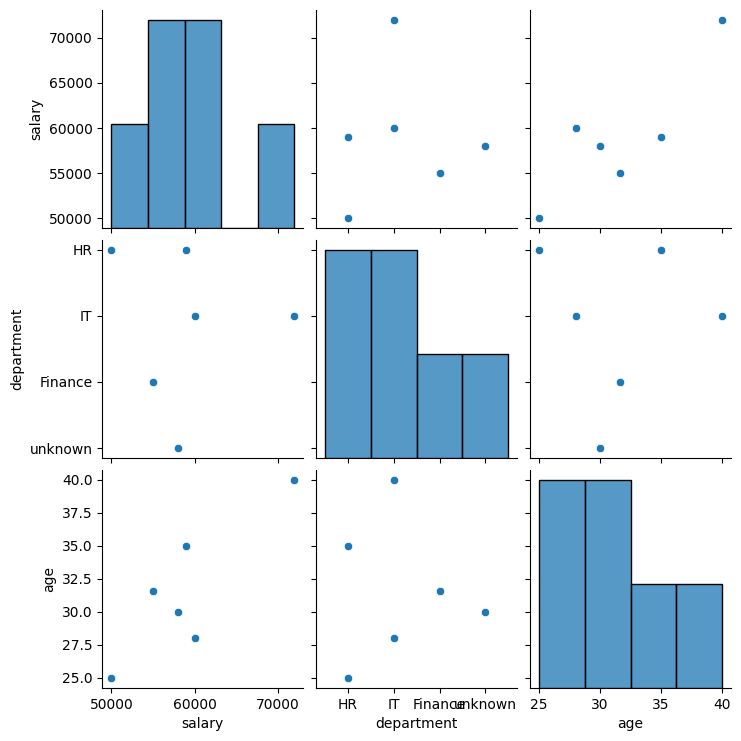

In [ ]:
# Verify the column names in your DataFrame
print(df.columns)

# Correct the column name in the pairplot function if there is a typo
sns.pairplot(df, vars=['salary', 'department', 'age'])  # Replace 'yearsofexperience' with the actual name if it's different
plt.show()

C) correlation heatup

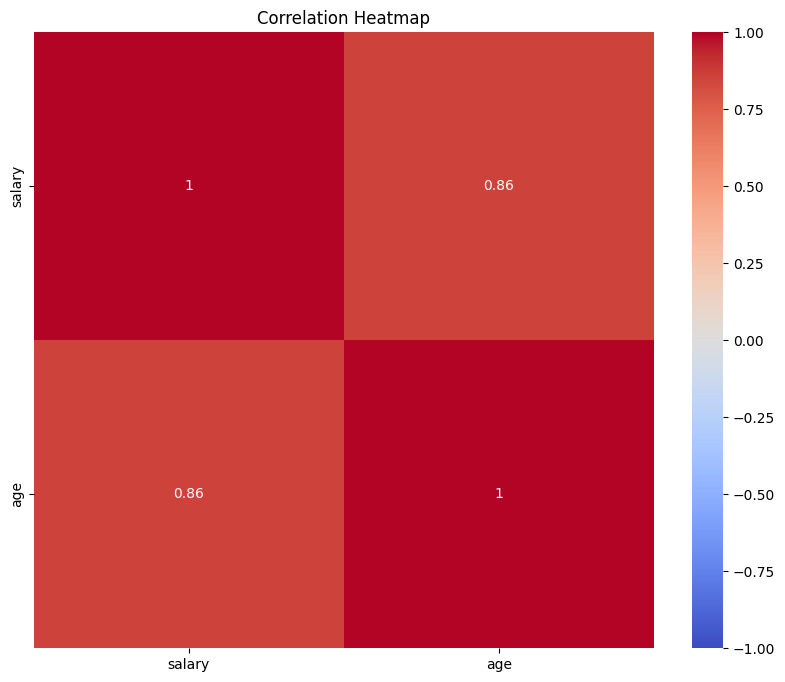

In [ ]:
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation calculation
numerical_df = df[['salary', 'age']]
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

D)count plot

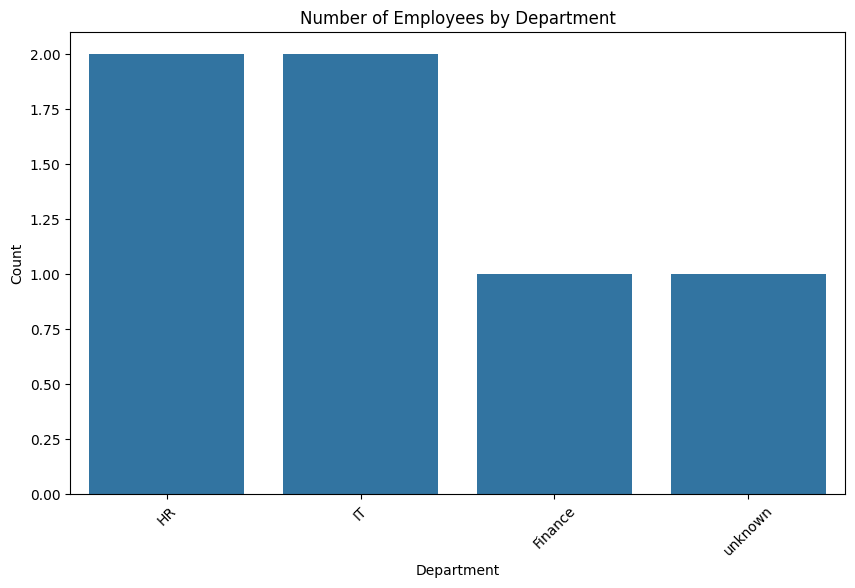

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='department', data=df)
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


E) pie chart representation

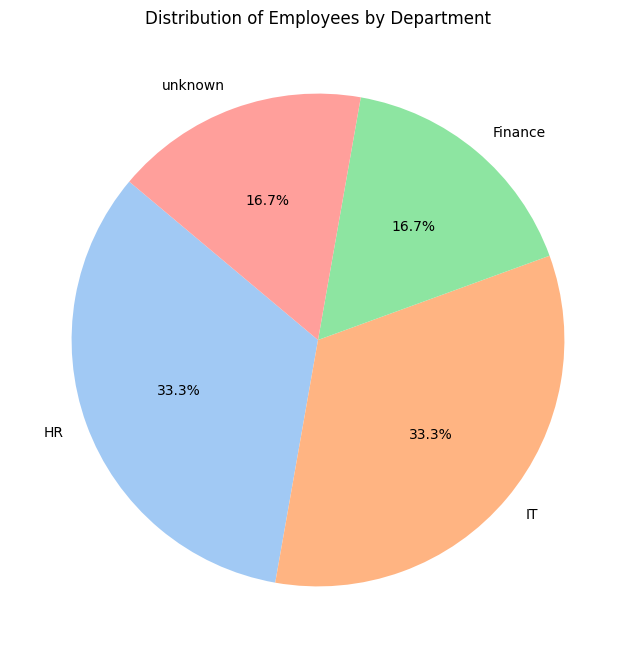

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
department_counts = df['department'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Employees by Department')
plt.show()


 10.Ensuring data quality and integrity


In [ ]:
# Check if 'tenure' column exists
if 'tenure' in df.columns:
    assert df['tenure'].min() >= 0, "There are negative values in tenure!"
else:
    print("Warning: 'tenure' column not found in the DataFrame.")

Thus, the project of data cleaning and data processing techniques are implemented by using python code imported libraries such as matplotlip,numpy,pandas and manymore that results desired output for the each code.
